# Predicting Coupon Redemption
 * https://www.kaggle.com/datasets/vasudeva009/predicting-coupon-redemption

### 데이터세트 정보 [쿠폰 사용 예측]

XYZ 신용 카드 회사는 기계 학습 및 분석 컨설팅을 제공하여 가맹점이 데이터를 더 잘 이해하고 주요 비즈니스 결정을 정확하게 내릴 수 있도록 정기적으로 지원합니다. ABC는 다양한 제품 범위에 대한 마케팅 캠페인을 자주 수행하는 기존의 Brick & Mortar 소매업체입니다. XYZ의 상인으로서 그들은 기계 학습의 힘을 사용하여 할인 마케팅 프로세스를 지원하기 위해 XYZ를 찾았습니다.

할인 마케팅 및 쿠폰 사용은 신규 고객을 유치하고 기존 고객의 충성도를 유지 및 강화하기 위해 매우 널리 사용되는 판촉 기법입니다. 쿠폰 사용에 대한 소비자 성향의 측정과 사용 행동 예측은 마케팅 캠페인의 효과를 평가하는 데 중요한 매개변수입니다.

ABC 프로모션은 이메일, 알림 등을 포함한 다양한 채널을 통해 공유됩니다. 이러한 캠페인에는 특정 제품/제품 범위에 대해 제공되는 쿠폰 할인이 포함됩니다. 소매업체는 고객이 채널을 통해 받은 쿠폰을 사용할지 여부를 예측할 수 있는 기능을 원합니다. 이를 통해 소매업체의 마케팅 팀은 쿠폰 구성을 정확하게 설계하고 보다 정확하고 표적화된 마케팅 전략을 개발할 수 있습니다.

이 문제에서 사용할 수 있는 데이터에는 이전 캠페인에서 사용된 캠페인 및 쿠폰 샘플의 세부 정보를 포함하여 다음 정보가 포함되어 있습니다.

User Demographic Details

Campaign and coupon Details

Product details

Previous transactions

지난 18개 캠페인의 이전 거래 및 실적 데이터를 기반으로 고객이 쿠폰을 사용할지 여부에 따라 각 쿠폰 및 고객 조합에 대한 테스트 세트의 다음 10개 캠페인에 대한 확률을 예측하십시오.

## 라이브러리

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from scipy.stats import mode
from bayes_opt import BayesianOptimization
import lightgbm as lgb


from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold
from sklearn.metrics import classification_report,roc_auc_score,roc_curve, f1_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import os

""
import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth',500)
pd.set_option('display.max_columns',5000)
from IPython.display import Image
import os
# !ls 
encoder = LabelEncoder()

%matplotlib inline

encoder = LabelEncoder()

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_colwidth',500)
pd.set_option('display.max_columns',5000)

## 데이터 불러오기

In [ ]:
train = pd.read_csv('datasets/train.csv')
campaign = pd.read_csv('datasets/campaign_data.csv')
items = pd.read_csv('datasets/item_data.csv')
coupons = pd.read_csv('datasets/coupon_item_mapping.csv')
cust_demo = pd.read_csv('datasets/customer_demographics.csv')
cust_tran = pd.read_csv('datasets/customer_transaction_data.csv')
test = pd.read_csv('datasets/test.csv')

In [ ]:
train.shape, campaign.shape, items.shape, coupons.shape, cust_demo.shape, cust_tran.shape, test.shape

((78369, 5),
 (28, 4),
 (74066, 4),
 (92663, 2),
 (760, 7),
 (1324566, 7),
 (50226, 4))

In [ ]:
print('Train Dataframe')
print(train.isnull().sum())
print('======================')
print('Campaign Dataframe')
print(campaign.isnull().sum())
print('======================')
print('Items Dataframe')
print(items.isnull().sum())
print('======================')
print('Coupons Dataframe')
print(coupons.isnull().sum())
print('======================')
print('Customer Demographics Dataframe')
print(cust_demo.isnull().sum())
print('======================')
print('Customer Transaction Dataframe')
print(cust_tran.isnull().sum())
print('======================')

print(test.isnull().sum())

Train Dataframe
id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
dtype: int64
Campaign Dataframe
campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64
Items Dataframe
item_id       0
brand         0
brand_type    0
category      0
dtype: int64
Coupons Dataframe
coupon_id    0
item_id      0
dtype: int64
Customer Demographics Dataframe
customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64
Customer Transaction Dataframe
date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64
id             0
campaign_id    0
coupon_id      0
customer_id    0
dtype: int64


In [ ]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [ ]:
train.redemption_status.value_counts(normalize=True)*100

0    99.069785
1     0.930215
Name: redemption_status, dtype: float64

Text(0, 0.5, 'redemption_status')

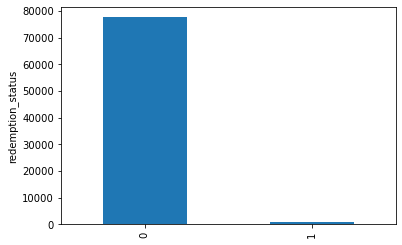

In [ ]:
value=train['redemption_status'].value_counts().plot(kind='bar')
plt.ylabel('redemption_status')

데이터의 불균형이 심함.

## 데이터 전처리

### Dealing with Customer Demographic Dataframe

In [ ]:
cust_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [ ]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [ ]:
cust_demo.marital_status.value_counts()

Married    317
Single     114
Name: marital_status, dtype: int64

In [ ]:
cust_demo.family_size.value_counts().sort_index()

1     248
2     303
3     104
4      48
5+     57
Name: family_size, dtype: int64

In [ ]:
cust_demo.no_of_children.value_counts().sort_index()

1     107
2      55
3+     60
Name: no_of_children, dtype: int64

In [ ]:
# int로 Dtype을 바꾸기 위해 '+'기호 제거, NaN값 무시하고 진행
cust_demo['family_size'] = cust_demo.family_size.apply(lambda x: int(re.sub('\+','',x)))
cust_demo['no_of_children'] = cust_demo.no_of_children.apply(lambda x: int(re.sub('\+','',x)) if pd.notna(x) else x)

In [ ]:
# marital_status 결측치 채우기

# family_size = 1 이면 single 
cust_demo.loc[pd.isnull(cust_demo.marital_status) & (cust_demo.family_size == 1),'marital_status'] = 'Single'

# family_size - no_of_children = 1 이면 single,
cust_demo.loc[(cust_demo.family_size - cust_demo.no_of_children == 1) & pd.isnull(cust_demo.marital_status),'marital_status'] = 'Single'

# family_size - no_of_children = 2 이면 Married.
cust_demo.loc[(pd.isnull(cust_demo.marital_status)) & ((cust_demo.family_size - cust_demo.no_of_children) == 2)  
              & (pd.notnull(cust_demo.no_of_children)),'marital_status'] = 'Married'

# family_size = 2인 고객, no_of_children가 결측치인데 Married인 고객 건너뛰기
cust_demo.loc[pd.isnull(cust_demo.marital_status) & (pd.isnull(cust_demo.no_of_children)) 
              & (cust_demo.family_size ==2),'marital_status'] = 'Married'

In [ ]:
a = cust_demo.marital_status.groupby((cust_demo.family_size - cust_demo.no_of_children) == 2).value_counts()
print(a[True])

marital_status
Married    186
Single      10
Name: marital_status, dtype: int64


In [ ]:
# b = cust_demo.marital_status.groupby((cust_demo.family_size) == 2 & pd.isnull(cust_demo.no_of_children)).value_counts()
# print(b)

In [ ]:
cust_demo.marital_status.isnull().sum()

0

In [ ]:
# no_of_children 결측치 채우기

# Married이고, family_size = 2 이면 no_of_children = 0
cust_demo.loc[pd.isnull(cust_demo.no_of_children) & (cust_demo.marital_status == 'Married') & (cust_demo.family_size == 2),'no_of_children'] = 0

# family_size = 2 이면 no_of_children = 0
cust_demo.loc[pd.isnull(cust_demo.no_of_children) & (cust_demo.family_size == 1), 'no_of_children'] = 0

# single이고 amily_size = 2 이면 no_of_children = 1
cust_demo.loc[pd.isnull(cust_demo.no_of_children) & (cust_demo.family_size == 2),'no_of_children'] = 1

cust_demo['no_of_children']=cust_demo['no_of_children'].astype(np.int64)

In [ ]:
cust_demo.no_of_children.isnull().sum()

0

In [ ]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  760 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    int64 
 5   no_of_children  760 non-null    int64 
 6   income_bracket  760 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 41.7+ KB


In [ ]:
# marital_status 라벨 인코딩, 0 = single, 1 = Married
cust_demo["marital_status"] = encoder.fit_transform(cust_demo["marital_status"])

In [ ]:
# age_range 라벨 인코딩 18-25 = 0, 26-35 = 1, 36-45 = 2, 46-55 = 3, 56-70 = 4, 70+ = 5
cust_demo["age_range"] = encoder.fit_transform(cust_demo["age_range"])

In [ ]:
cust_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,5,0,0,2,0,4
1,6,3,0,0,2,0,5
2,7,1,0,0,3,1,3
3,8,1,0,0,4,2,6
4,10,3,1,0,1,0,5


### Dealing with Campaign Dataframe

In [ ]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [ ]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [ ]:
campaign.campaign_type.value_counts()

Y    22
X     6
Name: campaign_type, dtype: int64

In [ ]:
# campaign_type 라벨 인코딩
campaign["campaign_type"] = encoder.fit_transform(campaign.campaign_type)

In [ ]:
# start_data, end_date Dtype [object -> datetime 변경]
campaign['start_date'] = pd.to_datetime(campaign['start_date'], format = '%d/%m/%y')
campaign['end_date'] = pd.to_datetime(campaign['end_date'], format = '%d/%m/%y')

In [ ]:
# campaign_duration 파생변수 생성
campaign["campaign_duration"] = campaign["end_date"] - campaign["start_date"]
campaign["campaign_duration"] = campaign["campaign_duration"].apply(lambda x: x.days) 

In [ ]:
campaign.sort_values('campaign_id')

,campaign_id,campaign_type,start_date,end_date,campaign_duration
21,1,1,2012-12-12,2013-01-18,37
22,2,1,2012-12-17,2013-01-18,32
18,3,1,2012-12-22,2013-02-16,56
20,4,1,2013-01-07,2013-02-08,32
19,5,1,2013-01-12,2013-02-15,34
17,6,1,2013-01-28,2013-03-01,32
16,7,1,2013-02-02,2013-03-08,34
15,8,0,2013-02-16,2013-04-05,48
14,9,1,2013-03-11,2013-04-12,32
13,10,1,2013-04-08,2013-05-10,32


### Dealing with Customer Transaction Dataframe

In [ ]:
cust_tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [ ]:
cust_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [ ]:
# date Dtype [object -> datetime 변경]
cust_tran['date'] = pd.to_datetime(cust_tran['date'])
cust_tran = cust_tran.sort_values('date').reset_index(drop=True)

In [ ]:
cust_tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.00
1,2012-01-02,464,20697,1,92.26,-21.37,-35.62
2,2012-01-02,464,20717,2,28.50,-27.78,0.00
3,2012-01-02,464,21008,1,35.26,-17.81,0.00
4,2012-01-02,464,22243,2,118.97,-22.80,0.00


In [ ]:
# date에서 day, dow, month 파생변수 생성
cust_tran['day'] = cust_tran["date"].apply(lambda x: x.day)
cust_tran['dow'] = cust_tran["date"].apply(lambda x: x.weekday())
cust_tran['month'] = cust_tran["date"].apply(lambda x: x.month)

In [ ]:
cust_tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day,dow,month
0,2012-01-02,1501,26830,1,35.26,-10.69,0.00,2,0,1
1,2012-01-02,464,20697,1,92.26,-21.37,-35.62,2,0,1
2,2012-01-02,464,20717,2,28.50,-27.78,0.00,2,0,1
3,2012-01-02,464,21008,1,35.26,-17.81,0.00,2,0,1
4,2012-01-02,464,22243,2,118.97,-22.80,0.00,2,0,1


In [ ]:
# Feature 가공
cust_tran.selling_price = cust_tran.selling_price/cust_tran.quantity
cust_tran.other_discount = cust_tran.other_discount/cust_tran.quantity
cust_tran.selling_price = cust_tran.selling_price - cust_tran.other_discount

In [ ]:
# 쿠폰 사용 여부를 알 수 있는 coupon_uesd 파생변수 생성
cust_tran['coupon_used'] = cust_tran.coupon_discount.apply(lambda x: 1 if x !=0 else 0)

In [ ]:
cust_tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day,dow,month,coupon_used
0,2012-01-02,1501,26830,1,45.950,-10.69,0.00,2,0,1,0
1,2012-01-02,464,20697,1,113.630,-21.37,-35.62,2,0,1,1
2,2012-01-02,464,20717,2,28.140,-13.89,0.00,2,0,1,0
3,2012-01-02,464,21008,1,53.070,-17.81,0.00,2,0,1,0
4,2012-01-02,464,22243,2,70.885,-11.40,0.00,2,0,1,0


### Dealing with Items Dataframe

In [ ]:
items.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [ ]:
items.brand_type.value_counts()

Established    62842
Local          11224
Name: brand_type, dtype: int64

In [ ]:
items.category.value_counts()

Grocery                   32448
Pharmaceutical            24471
Natural Products           2533
Dairy, Juices & Snacks     2425
Skin & Hair Care           2244
Meat                       2080
Packaged Meat              1966
Prepared Food              1880
Bakery                     1679
Seafood                     728
Flowers & Plants            664
Miscellaneous               385
Alcohol                     303
Garden                      102
Restauarant                  78
Salads                       40
Travel                       19
Fuel                         14
Vegetables (cut)              7
Name: category, dtype: int64

In [ ]:
# brand_type, category 라벨 인코딩
items.brand_type = encoder.fit_transform(items["brand_type"])
items.category = encoder.fit_transform(items["category"])

In [ ]:
items.head()

,item_id,brand,brand_type,category
0,1,1,0,6
1,2,1,0,8
2,3,56,1,1
3,4,56,1,6
4,5,56,1,6


## Dealing with Coupoun Dataframe

In [ ]:
coupons.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


## merge

### schema

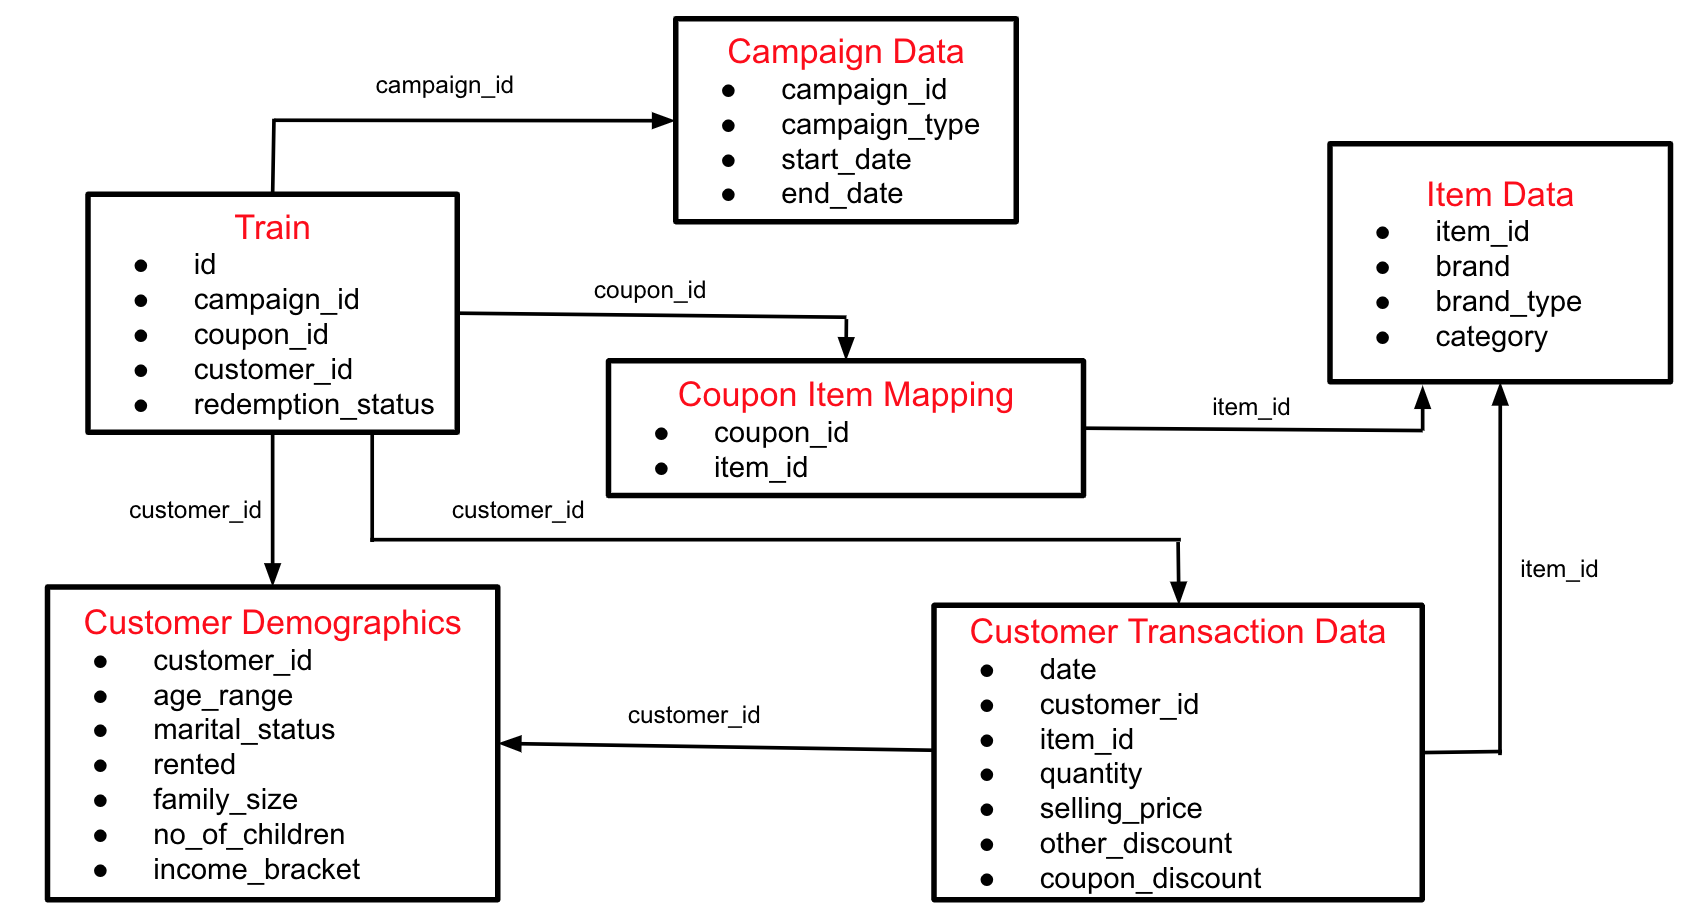

In [ ]:
Image("datasets/Schema.png")

1. 쿠폰상품매핑 데이터와 상품데이터 item_id로 __merge__
2. item_id 별로 고객 구매정보 __통계내기__
3. 1번과 2번 item_id로 __merge__
4. 상품별 통계 정보 3번 table을 coupon_id 별로 __통계내기__
5. 4번과 train 데이터 coupon_id로 __merge__
6. 고객구매정보 데이터 customer_id 별로 __통계내기__
7. 5번과 캠페인데이터 campaign_id로 __merge__
8. 7번과 고객 정보 데이터 customer_id로 __merge__
9. 6번과 8번 customer_id로 __merge__

### Step 1: 
쿠폰상품매핑 데이터와 상품데이터 item_id로 __merge__

In [ ]:
coupons_items = pd.merge(coupons, items, on="item_id", how="left")

In [ ]:
coupons_items.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,1,6
1,107,75,56,1,6
2,494,76,209,0,6
3,522,77,278,0,6
4,518,77,278,0,6


### Step 2:
item_id 별로 고객 구매정보 __통계내기__

In [ ]:
cust_tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day,dow,month,coupon_used
0,2012-01-02,1501,26830,1,45.950,-10.69,0.00,2,0,1,0
1,2012-01-02,464,20697,1,113.630,-21.37,-35.62,2,0,1,1
2,2012-01-02,464,20717,2,28.140,-13.89,0.00,2,0,1,0
3,2012-01-02,464,21008,1,53.070,-17.81,0.00,2,0,1,0
4,2012-01-02,464,22243,2,70.885,-11.40,0.00,2,0,1,0


In [ ]:
# Aggregate transactions by item_id by mean for a particular customer
# 상품별 평균, 상품별 쿠폰 사용 횟수

transactions1 = pd.pivot_table(cust_tran, index = "item_id", 
               values=['customer_id','quantity','selling_price', 'other_discount','coupon_discount','coupon_used'],
               aggfunc={'customer_id':lambda x: len(set(x)),
                        'quantity':np.mean,
                        'selling_price':np.mean,
                        'other_discount':np.mean,
                        'coupon_discount':np.mean,
                        'coupon_used': np.sum
                        } )
transactions1.reset_index(inplace=True)
transactions1.rename(columns={'customer_id': 'no_of_customers'}, inplace=True)

In [ ]:
transactions1.head()

,item_id,coupon_discount,coupon_used,no_of_customers,other_discount,quantity,selling_price
0,1,0.0,0,2,0.0,1.0,124.31
1,2,0.0,0,1,0.0,1.0,35.26
2,3,0.0,0,1,0.0,1.0,56.64
3,4,0.0,0,1,0.0,1.0,54.85
4,5,0.0,0,1,0.0,1.0,81.57


In [ ]:
# Aggregate transactions by item_id by sum for a particular customer
# 상품별 쿠폰 할인 총액, 상품 구매자 수, 다른할인총액, 팔린 수량, 상품별 총 수익

transactions2 = pd.pivot_table(cust_tran, index = "item_id", 
               values=['customer_id','quantity','selling_price', 'other_discount','coupon_discount'],
               aggfunc={'customer_id':len,
                        'quantity':np.sum,
                        'selling_price':np.sum,
                        'other_discount':np.sum,
                        'coupon_discount':np.sum,
                        } )
transactions2.reset_index(inplace=True)
transactions2.rename(columns={'customer_id': 't_counts', 'quantity':'qu_sum',
                             'selling_price':'price_sum', 'other_discount':'od_sum',
                             'coupon_discount':'cd_sum'}, inplace=True)

In [ ]:
transactions2.head()

,item_id,cd_sum,t_counts,od_sum,qu_sum,price_sum
0,1,0.0,2,0.0,2,248.62
1,2,0.0,1,0.0,1,35.26
2,3,0.0,1,0.0,1,56.64
3,4,0.0,1,0.0,1,54.85
4,5,0.0,1,0.0,1,81.57


In [ ]:
# 상품별 통계정보 취합
transactions1 = pd.merge(transactions1, transactions2, on='item_id',how='left' )

In [ ]:
# 상품별 총 할인액 평균, 상품별 총 할인액 총합
transactions1['total_discount_mean'] = transactions1['coupon_discount'] + transactions1['other_discount']
transactions1['total_discount_sum'] = transactions1['od_sum'] + transactions1['cd_sum']
transactions1.head()

,item_id,coupon_discount,coupon_used,no_of_customers,other_discount,quantity,selling_price,cd_sum,t_counts,od_sum,qu_sum,price_sum,total_discount_mean,total_discount_sum
0,1,0.0,0,2,0.0,1.0,124.31,0.0,2,0.0,2,248.62,0.0,0.0
1,2,0.0,0,1,0.0,1.0,35.26,0.0,1,0.0,1,35.26,0.0,0.0
2,3,0.0,0,1,0.0,1.0,56.64,0.0,1,0.0,1,56.64,0.0,0.0
3,4,0.0,0,1,0.0,1.0,54.85,0.0,1,0.0,1,54.85,0.0,0.0
4,5,0.0,0,1,0.0,1.0,81.57,0.0,1,0.0,1,81.57,0.0,0.0


### Step 3:
1번과 2번 item_id로 __merge__

In [ ]:
item_coupon_trans = pd.merge(coupons_items, transactions1, on='item_id', how='left')

In [ ]:
item_coupon_trans.head()

,coupon_id,item_id,brand,brand_type,category,coupon_discount,coupon_used,no_of_customers,other_discount,quantity,selling_price,cd_sum,t_counts,od_sum,qu_sum,price_sum,total_discount_mean,total_discount_sum
0,105,37,56,1,6,0.0,0.0,2.0,-8.108333,2.285714,57.247381,0.0,7.0,-56.758333,16.0,400.731667,-8.108333,-56.758333
1,107,75,56,1,6,0.0,0.0,4.0,-2.633712,1.363636,38.828485,0.0,33.0,-86.912500,45.0,1281.340000,-2.633712,-86.912500
2,494,76,209,0,6,0.0,0.0,1.0,-17.450000,1.000000,106.500000,0.0,1.0,-17.450000,1.0,106.500000,-17.450000,-17.450000
3,522,77,278,0,6,0.0,0.0,2.0,-16.920000,1.000000,87.270000,0.0,2.0,-33.840000,2.0,174.540000,-16.920000,-33.840000
4,518,77,278,0,6,0.0,0.0,2.0,-16.920000,1.000000,87.270000,0.0,2.0,-33.840000,2.0,174.540000,-16.920000,-33.840000


In [ ]:
item_coupon_trans.columns

Index(['coupon_id', 'item_id', 'brand', 'brand_type', 'category',
       'coupon_discount', 'coupon_used', 'no_of_customers', 'other_discount',
       'quantity', 'selling_price', 'cd_sum', 't_counts', 'od_sum', 'qu_sum',
       'price_sum', 'total_discount_mean', 'total_discount_sum'],
      dtype='object')

### Step 4:
상품별 통계 정보 3번 table을 coupon_id 별로 __통계내기__

In [ ]:
# 쿠폰별 통계내기
# 쿠폰별 사용가능한 상품 수, 최빈 브랜드, 최빈 브랜드 타입, 최빈 카테고리, 
# 쿠폰별 할인액 평균, 쿠폰 사용 고객 평균, 다른 할인액 평균, 쿠폰별 상품 구매 수량 평균
# 쿠폰별 상품 평균구매액 평균, 쿠폰 사용수, 사용자 수, 
# 다른할인액 합계, 쿠폰할인액 합계, 총할인액 평균, 총할인액 합계

coupon = pd.pivot_table(item_coupon_trans, index ="coupon_id",
                         values=[ 'item_id', 'brand', 'brand_type', 'category',
       'coupon_discount', 'coupon_used', 'no_of_customers', 'other_discount',
       'quantity', 'selling_price', 'cd_sum', 't_counts', 'od_sum', 'qu_sum',
       'price_sum', 'total_discount_mean', 'total_discount_sum'],
              aggfunc={'item_id':lambda x: len(set(x)),
                       'brand':lambda x: mode(x)[0][0],
                       'brand_type':lambda x: mode(x)[0][0],
                       'category':lambda x: mode(x)[0][0],
                       'coupon_discount':np.mean,
                       'no_of_customers':np.mean,
                       'other_discount':np.mean,
                       'quantity':np.mean,
                       'selling_price':np.mean,
                       'coupon_used': np.sum,
                       'cd_sum': np.sum,
                       't_counts': np.sum,
                       'od_sum': np.sum,
                       'qu_sum': np.sum,
                       'price_sum': np.sum,
                       'total_discount_mean': np.mean,
                       'total_discount_sum': np.sum
                      })
coupon.reset_index(inplace=True)

In [ ]:
coupon.rename(columns={'item_id':'item_counts'}, inplace=True)

In [ ]:
coupon.head()

,coupon_id,brand,brand_type,category,cd_sum,coupon_discount,coupon_used,item_counts,no_of_customers,od_sum,other_discount,price_sum,qu_sum,quantity,selling_price,t_counts,total_discount_mean,total_discount_sum
0,1,1475,0,9,-1526.31,-1.321524,35.0,39,14.794872,-18780.020833,-16.620713,89796.868333,1034.0,1.221644,101.183245,826.0,-17.942237,-20306.330833
1,2,2084,0,6,0.00,0.000000,0.0,2,15.000000,-1163.521667,-21.343885,8940.520000,103.0,1.137500,122.534500,81.0,-21.343885,-1163.521667
2,3,278,0,6,-578.81,-2.747358,15.0,17,8.588235,-4055.343333,-14.728021,27756.490000,248.0,1.121525,131.655894,212.0,-17.475379,-4634.153333
3,4,544,0,6,-881.59,-1.485152,44.0,24,22.333333,-25895.740000,-36.718597,142874.023333,702.0,1.020872,211.708369,676.0,-38.203749,-26777.330000
4,5,5357,0,11,0.00,0.000000,0.0,7,6.000000,-1228.880000,-27.265786,16636.570000,44.0,1.000000,403.970000,44.0,-27.265786,-1228.880000


### Step 6:
고객구매정보 데이터 customer_id 별로 __통계내기__

In [ ]:
# Aggregate transactions by customer_id
transactions3 = pd.pivot_table(cust_tran, index = "customer_id", 
               values=['item_id','quantity','selling_price', 'other_discount','coupon_discount','coupon_used','day','dow','month'],
               aggfunc={'item_id':lambda x: len(set(x)),
                        'quantity':np.mean,
                        'selling_price':np.mean,
                        'other_discount':np.mean,
                        'coupon_discount':np.mean,
                        'coupon_used': np.sum,
                        'day':lambda x: mode(x)[0][0],
                        'dow':lambda x: mode(x)[0][0],
                        'month':lambda x: mode(x)[0][0]}
              )
transactions3.reset_index(inplace=True)
transactions3.rename(columns={'item_id': 'no_of_items'}, inplace=True)
transactions3.head()

,customer_id,coupon_discount,coupon_used,day,dow,no_of_items,month,other_discount,quantity,selling_price
0,1,-2.019876,78,3,3,463,5,-12.837537,1.170802,97.470480
1,2,-0.595084,4,13,5,352,6,-13.432195,1.131265,107.805783
2,3,-3.091546,53,16,4,406,7,-14.074853,11.578723,85.082452
3,4,-0.404773,1,14,5,125,5,-8.883656,1.272727,138.256770
4,5,-0.114684,2,11,1,490,5,-11.260696,117.869949,115.482842


In [ ]:
# Aggregate transactions by customer_id by sum
transactions4 = pd.pivot_table(cust_tran, index = "customer_id", 
               values=['item_id','quantity','selling_price', 'other_discount','coupon_discount'],
               aggfunc={'item_id':len,
                        'quantity':np.sum,
                        'selling_price':np.sum,
                        'other_discount':np.sum,
                        'coupon_discount':np.sum}
              )
transactions4.reset_index(inplace=True)
transactions4.rename(columns={'item_id': 'customer_id_count','quantity':'qa_sum','selling_price':'pprice_sum',
                             'other_discount':'odd_sum','coupon_discount':'cdd_sum'  }, inplace=True)
transactions4.head()

,customer_id,cdd_sum,customer_id_count,odd_sum,qa_sum,pprice_sum
0,1,-2116.83,1048,-13453.738833,1227,102149.063000
1,2,-249.34,419,-5628.089833,474,45170.623167
2,3,-2179.54,705,-9922.771654,8163,59983.128347
3,4,-89.05,220,-1954.404333,280,30416.489333
4,5,-90.83,792,-8918.471477,93353,91462.410620


In [ ]:
transactions = pd.merge(transactions3, transactions4, on='customer_id', how='left')
transactions.head()

,customer_id,coupon_discount,coupon_used,day,dow,no_of_items,month,other_discount,quantity,selling_price,cdd_sum,customer_id_count,odd_sum,qa_sum,pprice_sum
0,1,-2.019876,78,3,3,463,5,-12.837537,1.170802,97.470480,-2116.83,1048,-13453.738833,1227,102149.063000
1,2,-0.595084,4,13,5,352,6,-13.432195,1.131265,107.805783,-249.34,419,-5628.089833,474,45170.623167
2,3,-3.091546,53,16,4,406,7,-14.074853,11.578723,85.082452,-2179.54,705,-9922.771654,8163,59983.128347
3,4,-0.404773,1,14,5,125,5,-8.883656,1.272727,138.256770,-89.05,220,-1954.404333,280,30416.489333
4,5,-0.114684,2,11,1,490,5,-11.260696,117.869949,115.482842,-90.83,792,-8918.471477,93353,91462.410620


### Step 5,7,8,9

4번과 train 데이터 coupon_id로 __merge__

5번과 캠페인데이터 campaign_id로 __merge__

7번과 고객 정보 데이터 customer_id로 __merge__

6번과 8번 customer_id로 __merge__

In [ ]:
def merge_all(df): 
    df = pd.merge(df, coupon, on="coupon_id", how="left")
    df = pd.merge(df, campaign, on="campaign_id", how="left")
    df = pd.merge(df, cust_demo, on="customer_id", how="left")
    df = pd.merge(df, transactions, on='customer_id', how='left')
    return df

In [ ]:
train = merge_all(train)
test = merge_all(test)

In [ ]:
train.shape, test.shape

((78369, 46), (50226, 45))

In [ ]:
## To save the final file after merging the data
# train.to_csv('FinalData.csv', index=False)

## 데이터 merge 중 생긴 Null값 처리

In [ ]:
# train = pd.read_csv('FinalData.csv')

In [ ]:
train.isnull().sum()

id                         0
campaign_id                0
coupon_id                  0
customer_id                0
redemption_status          0
brand                      0
brand_type                 0
category                   0
cd_sum                     0
coupon_discount_x          0
coupon_used_x              0
item_counts                0
no_of_customers            0
od_sum                     0
other_discount_x           0
price_sum                  0
qu_sum                     0
quantity_x                 0
selling_price_x            0
t_counts                   0
total_discount_mean        0
total_discount_sum         0
campaign_type              0
start_date                 0
end_date                   0
campaign_duration          0
age_range              34708
marital_status         34708
rented                 34708
family_size            34708
no_of_children         34708
income_bracket         34708
coupon_discount_y          0
coupon_used_y              0
day           

In [ ]:
test.isnull().sum()

id                         0
campaign_id                0
coupon_id                  0
customer_id                0
brand                      0
brand_type                 0
category                   0
cd_sum                     0
coupon_discount_x          0
coupon_used_x              0
item_counts                0
no_of_customers            0
od_sum                     0
other_discount_x           0
price_sum                  0
qu_sum                     0
quantity_x                 0
selling_price_x            0
t_counts                   0
total_discount_mean        0
total_discount_sum         0
campaign_type              0
start_date                 0
end_date                   0
campaign_duration          0
age_range              19287
marital_status         19287
rented                 19287
family_size            19287
no_of_children         19287
income_bracket         19287
coupon_discount_y          0
coupon_used_y              0
day                        0
dow           

**Observation**

결측값

1. age_range
2. marital_status
3. rented
4. family_size
5. no_of_children
6. income_bracke

In [ ]:
# 결측값 처리
def deal_na(df):
    for col in cust_demo.columns:
        df[col].fillna(mode(df[col], nan_policy='omit').mode[0], inplace=True)
    return df

train = deal_na(train)
test = deal_na(test)

In [ ]:
train.isnull().sum()

id                     0
campaign_id            0
coupon_id              0
customer_id            0
redemption_status      0
brand                  0
brand_type             0
category               0
cd_sum                 0
coupon_discount_x      0
coupon_used_x          0
item_counts            0
no_of_customers        0
od_sum                 0
other_discount_x       0
price_sum              0
qu_sum                 0
quantity_x             0
selling_price_x        0
t_counts               0
total_discount_mean    0
total_discount_sum     0
campaign_type          0
start_date             0
end_date               0
campaign_duration      0
age_range              0
marital_status         0
rented                 0
family_size            0
no_of_children         0
income_bracket         0
coupon_discount_y      0
coupon_used_y          0
day                    0
dow                    0
no_of_items            0
month                  0
other_discount_y       0
quantity_y             0


In [ ]:
test.isnull().sum()

id                     0
campaign_id            0
coupon_id              0
customer_id            0
brand                  0
brand_type             0
category               0
cd_sum                 0
coupon_discount_x      0
coupon_used_x          0
item_counts            0
no_of_customers        0
od_sum                 0
other_discount_x       0
price_sum              0
qu_sum                 0
quantity_x             0
selling_price_x        0
t_counts               0
total_discount_mean    0
total_discount_sum     0
campaign_type          0
start_date             0
end_date               0
campaign_duration      0
age_range              0
marital_status         0
rented                 0
family_size            0
no_of_children         0
income_bracket         0
coupon_discount_y      0
coupon_used_y          0
day                    0
dow                    0
no_of_items            0
month                  0
other_discount_y       0
quantity_y             0
selling_price_y        0


## 필요없는 열 삭제 후 모델 구축 데이터 준비

In [ ]:
test_id = test['id']
target = train['redemption_status']
train.drop(['id','campaign_id','start_date','end_date'], axis=1, inplace=True)
test.drop(['id','campaign_id','start_date','end_date'], axis=1, inplace=True)

In [ ]:
train.head()

,coupon_id,customer_id,redemption_status,brand,brand_type,category,cd_sum,coupon_discount_x,coupon_used_x,item_counts,no_of_customers,od_sum,other_discount_x,price_sum,qu_sum,quantity_x,selling_price_x,t_counts,total_discount_mean,total_discount_sum,campaign_type,campaign_duration,age_range,marital_status,rented,family_size,no_of_children,income_bracket,coupon_discount_y,coupon_used_y,day,dow,no_of_items,month,other_discount_y,quantity_y,selling_price_y,cdd_sum,customer_id_count,odd_sum,qa_sum,pprice_sum
0,27,1053,0,1105,0,6,-5349.93,-1.241694,191.0,125,19.224000,-177447.090167,-44.367382,436274.446738,4661.0,1.169768,117.276864,3713.0,-45.609077,-182797.020167,0,47,3.0,1.0,0.0,1.0,0.0,5.0,-0.287258,1,11,2,208,5,-25.583099,340.487097,163.966826,-89.05,310,-7930.760842,105551,50829.715972
1,116,48,0,56,1,6,0.00,0.000000,0.0,3,20.333333,-586.140000,-10.207037,5323.510000,86.0,1.050926,70.885046,75.0,-10.207037,-586.140000,0,47,2.0,0.0,0.0,2.0,0.0,3.0,-3.215039,12,4,5,244,6,-20.013685,31.540260,188.638474,-1237.79,385,-7705.268702,12143,72625.812434
2,635,205,0,560,0,11,-605.54,-2.987321,15.0,67,1.761194,-12475.083333,-76.767366,48980.998333,202.0,1.353802,342.826195,142.0,-79.754687,-13080.623333,1,32,3.0,0.0,0.0,2.0,0.0,7.0,-2.212082,85,27,2,533,3,-12.873370,1.392784,112.067666,-2145.72,970,-12487.169143,1351,108705.636349
3,644,1050,0,611,0,6,-17.81,-4.452500,1.0,4,3.500000,-260.750000,-4.451964,3697.783333,47.0,1.110390,88.694903,39.0,-8.904464,-278.560000,0,47,3.0,0.0,0.0,2.0,0.0,5.0,-0.751477,2,9,4,216,8,-12.880868,1.291139,100.896997,-178.10,237,-3052.765833,306,23912.588333
4,1017,1489,0,1558,0,6,-569.92,-0.198055,23.0,32,27.312500,-46796.046667,-30.665116,289181.848333,1610.0,1.071044,200.991719,1420.0,-30.863170,-47365.966667,0,48,3.0,0.0,0.0,2.0,0.0,3.0,-0.471548,10,2,4,327,5,-12.264174,247.443060,85.016352,-265.01,562,-6892.466021,139063,47779.189609


In [ ]:
train.columns

Index(['coupon_id', 'customer_id', 'redemption_status', 'brand', 'brand_type',
       'category', 'cd_sum', 'coupon_discount_x', 'coupon_used_x',
       'item_counts', 'no_of_customers', 'od_sum', 'other_discount_x',
       'price_sum', 'qu_sum', 'quantity_x', 'selling_price_x', 't_counts',
       'total_discount_mean', 'total_discount_sum', 'campaign_type',
       'campaign_duration', 'age_range', 'marital_status', 'rented',
       'family_size', 'no_of_children', 'income_bracket', 'coupon_discount_y',
       'coupon_used_y', 'day', 'dow', 'no_of_items', 'month',
       'other_discount_y', 'quantity_y', 'selling_price_y', 'cdd_sum',
       'customer_id_count', 'odd_sum', 'qa_sum', 'pprice_sum'],
      dtype='object')

In [ ]:
train.shape

(78369, 42)

In [ ]:
target

0        0
1        0
2        0
3        0
4        0
        ..
78364    0
78365    0
78366    0
78367    0
78368    0
Name: redemption_status, Length: 78369, dtype: int64

## EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   coupon_id            78369 non-null  int64  
 1   customer_id          78369 non-null  int64  
 2   redemption_status    78369 non-null  int64  
 3   brand                78369 non-null  int64  
 4   brand_type           78369 non-null  int32  
 5   category             78369 non-null  int32  
 6   cd_sum               78369 non-null  float64
 7   coupon_discount_x    78369 non-null  float64
 8   coupon_used_x        78369 non-null  float64
 9   item_counts          78369 non-null  int64  
 10  no_of_customers      78369 non-null  float64
 11  od_sum               78369 non-null  float64
 12  other_discount_x     78369 non-null  float64
 13  price_sum            78369 non-null  float64
 14  qu_sum               78369 non-null  float64
 15  quantity_x           78369 non-null 

In [ ]:
def show_hist_by_target(df, columns):
    cond_1 = (train['redemption_status'] == 1)
    cond_0 = (train['redemption_status'] == 0)
    
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), squeeze=False)
        sns.violinplot(x='redemption_status', y=column, data=df, ax=axs[0][0] )
        sns.distplot(df[cond_0][column], ax=axs[0][1], label='0', color='blue')
        sns.distplot(df[cond_1][column], ax=axs[0][1], label='1', color='red') 

In [ ]:
train_columns = train.dtypes[train.dtypes != 'redemption_status'].index.tolist()
train_columns = [column for column in train_columns if column not in['id','campaign_id','coupon_id','customer_id', 'redemption_status']]
print(train_columns)

['brand', 'brand_type', 'category', 'cd_sum', 'coupon_discount_x', 'coupon_used_x', 'item_counts', 'no_of_customers', 'od_sum', 'other_discount_x', 'price_sum', 'qu_sum', 'quantity_x', 'selling_price_x', 't_counts', 'total_discount_mean', 'total_discount_sum', 'campaign_type', 'campaign_duration', 'age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_bracket', 'coupon_discount_y', 'coupon_used_y', 'day', 'dow', 'no_of_items', 'month', 'other_discount_y', 'quantity_y', 'selling_price_y', 'cdd_sum', 'customer_id_count', 'odd_sum', 'qa_sum', 'pprice_sum']


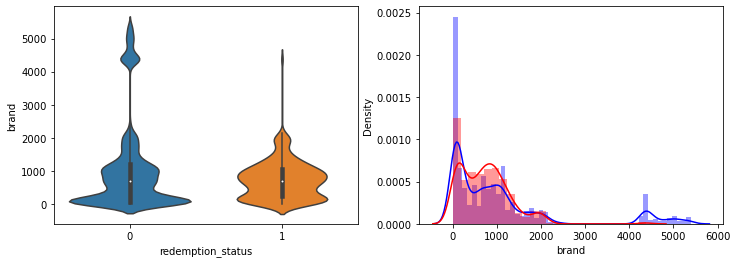

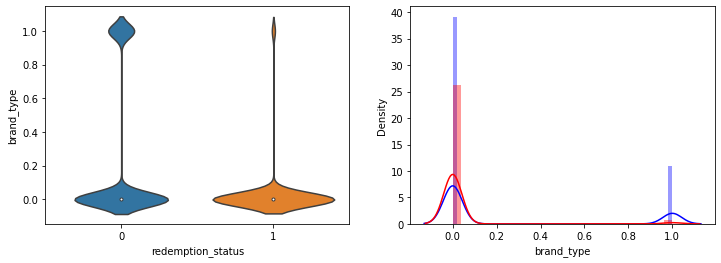

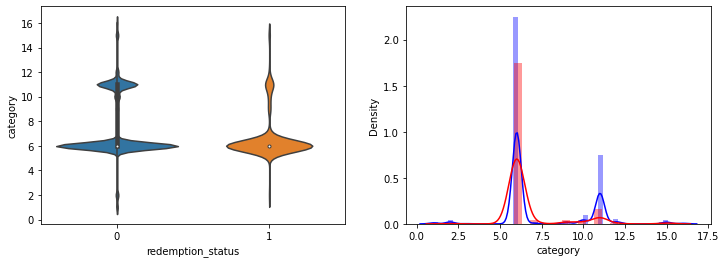

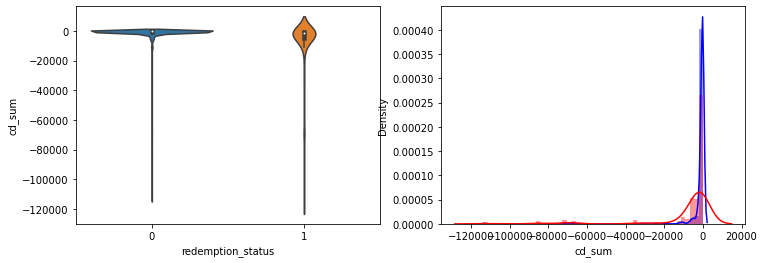

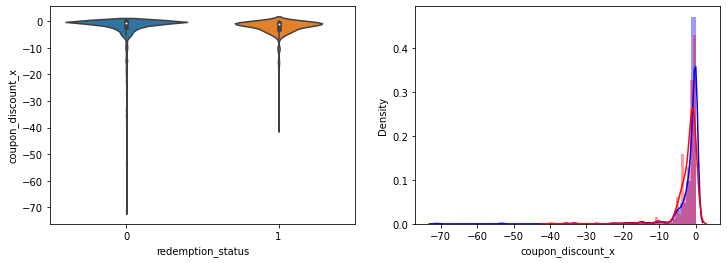

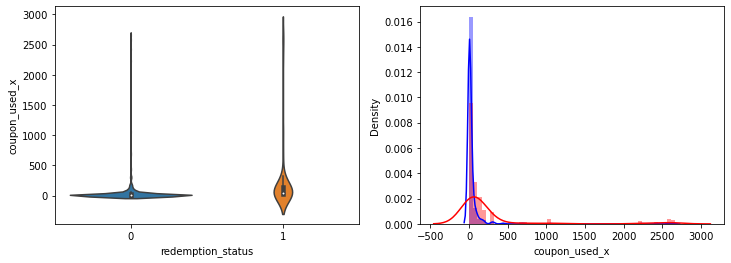

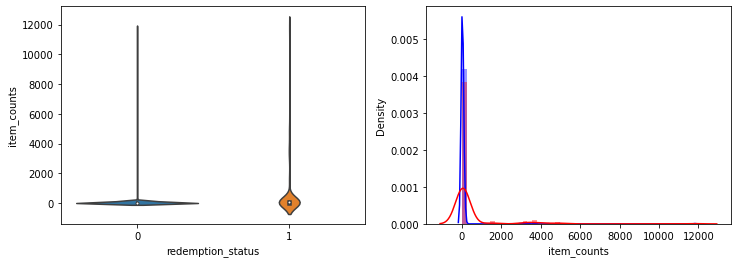

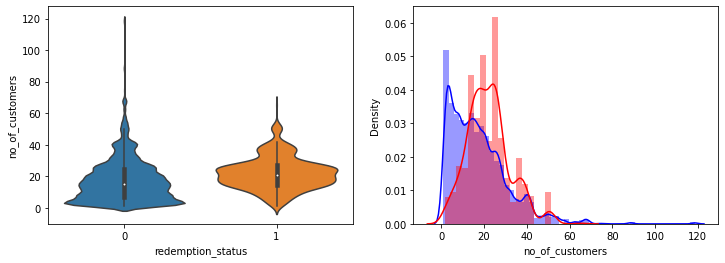

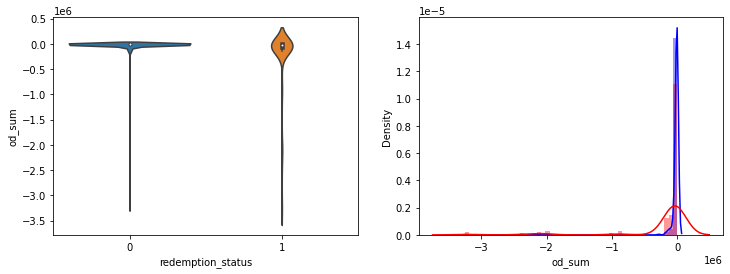

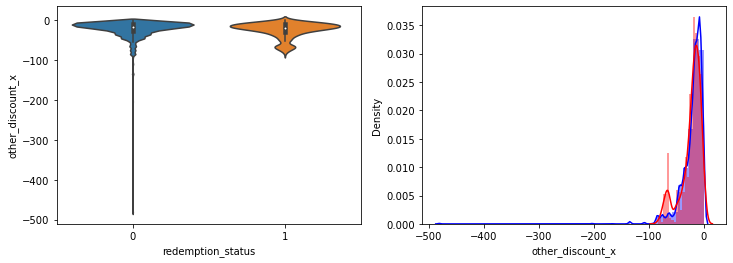

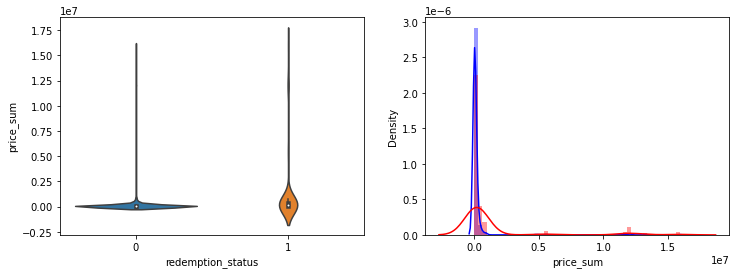

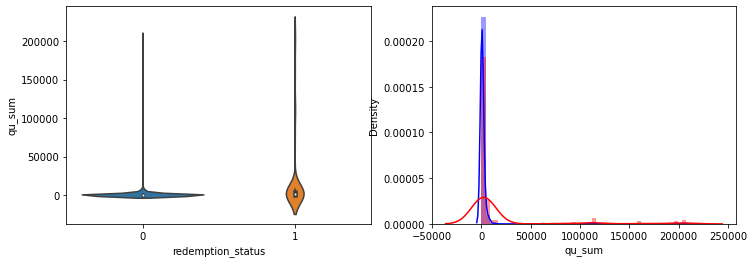

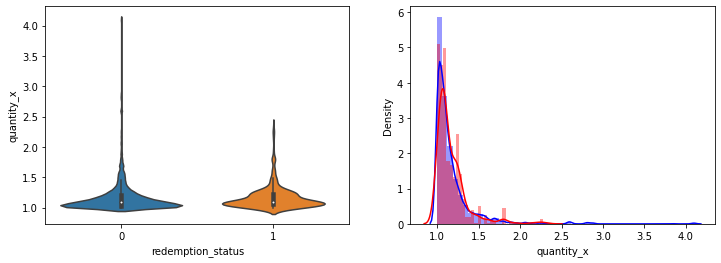

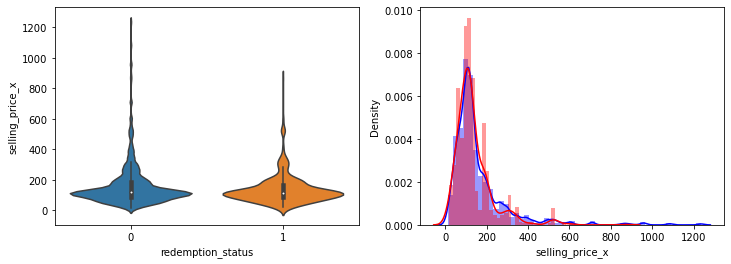

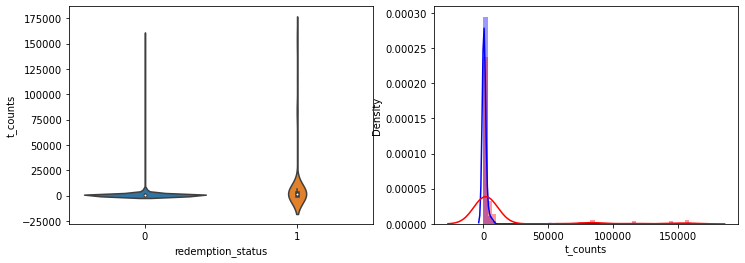

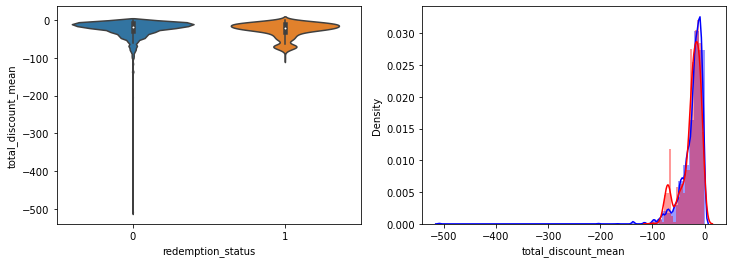

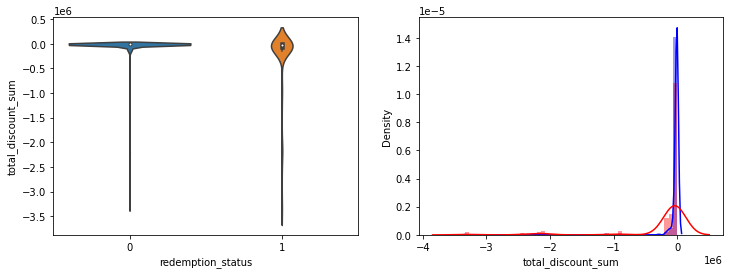

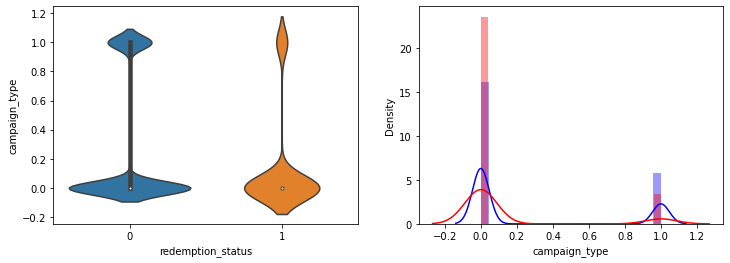

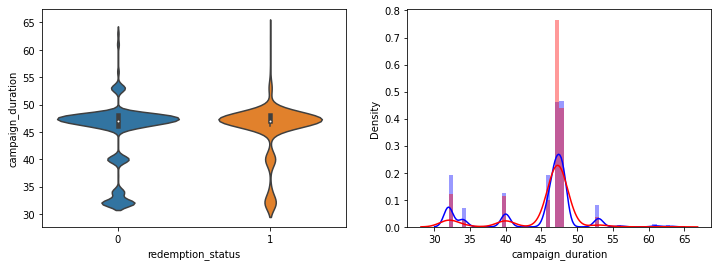

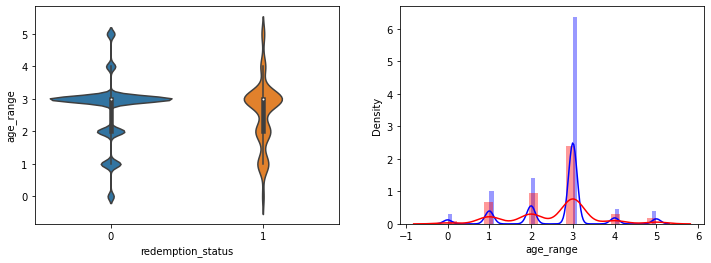

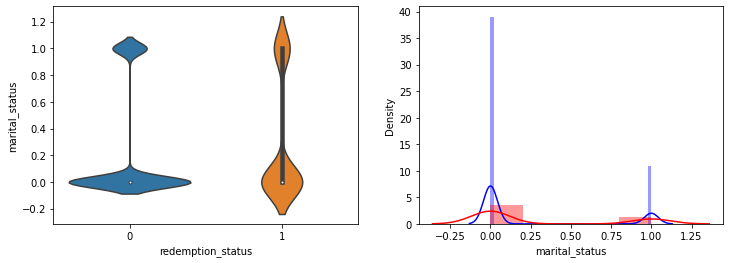

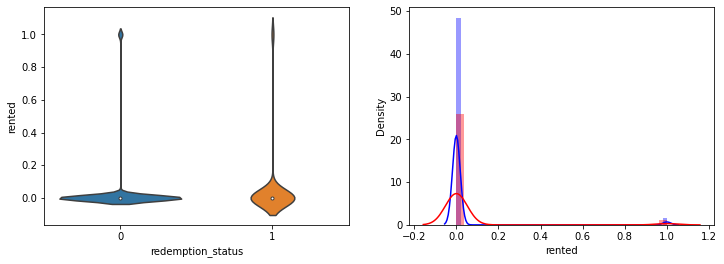

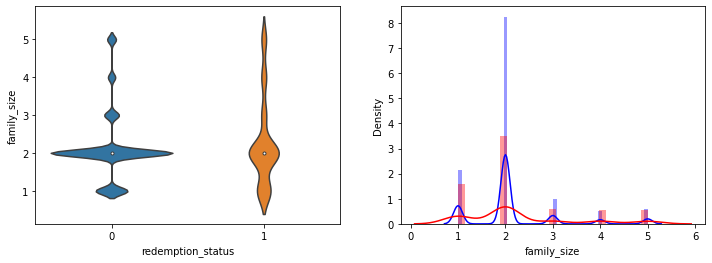

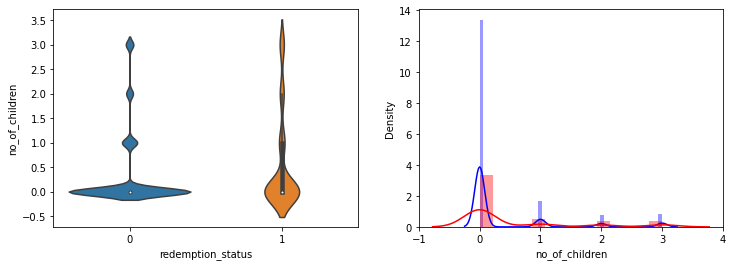

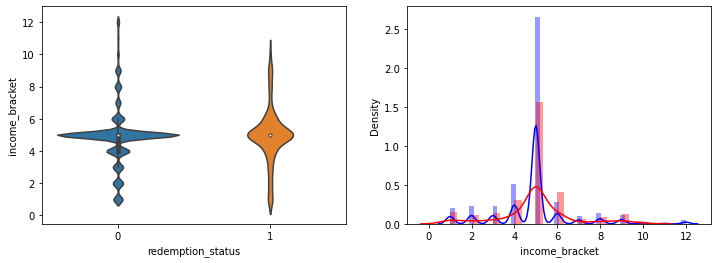

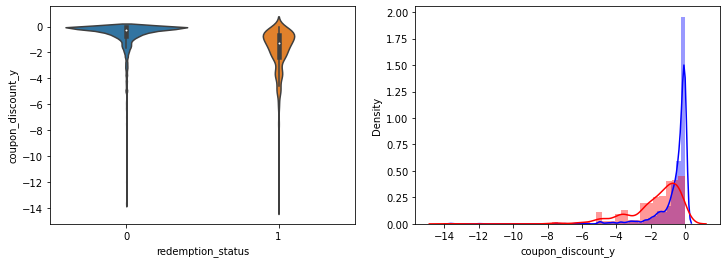

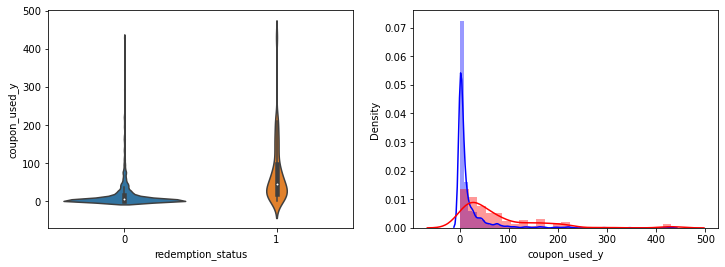

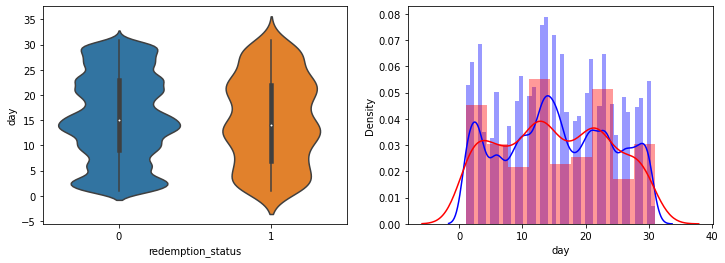

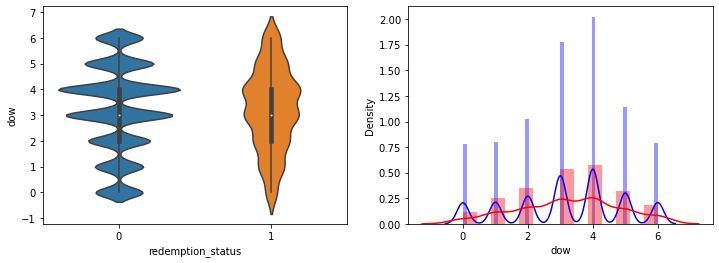

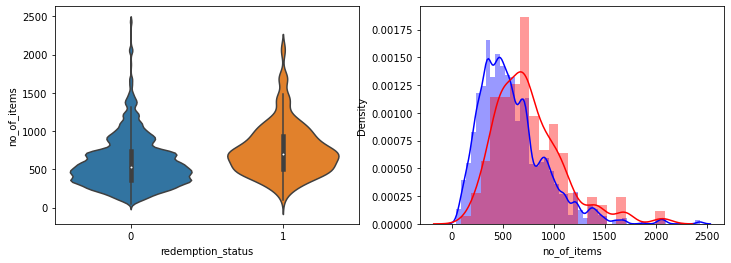

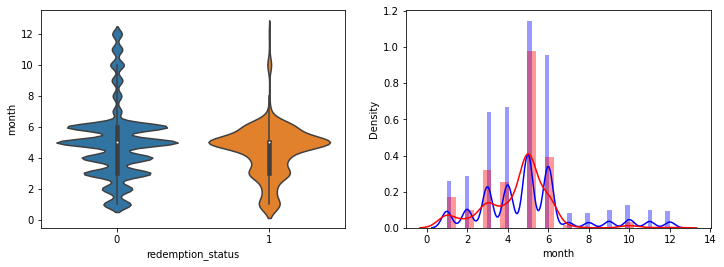

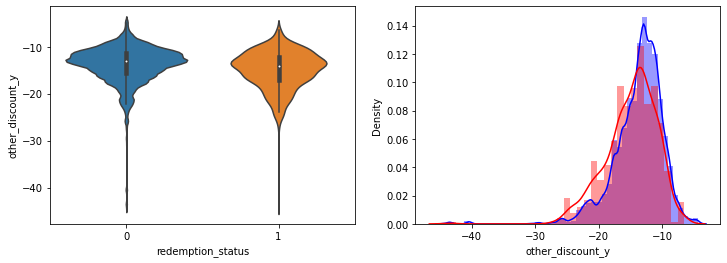

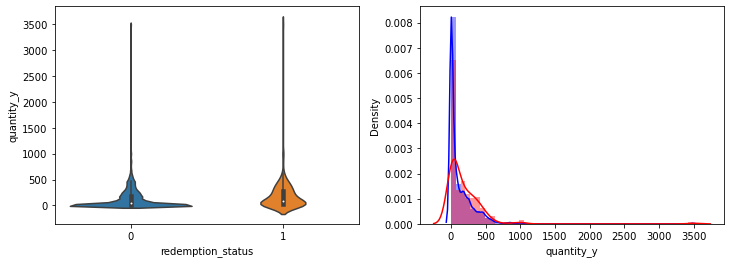

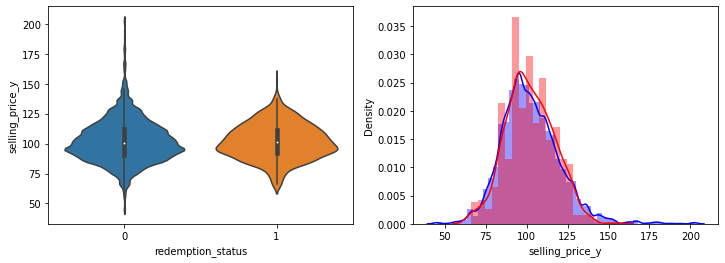

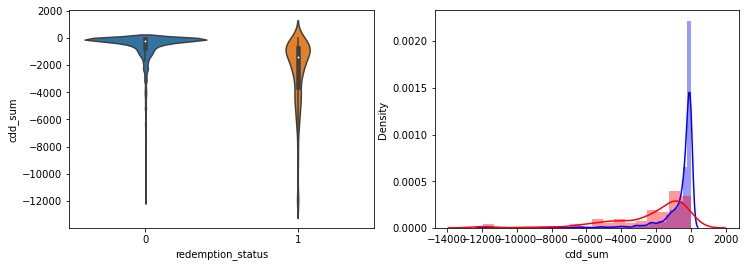

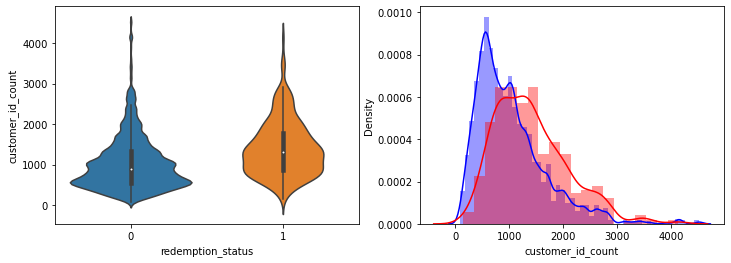

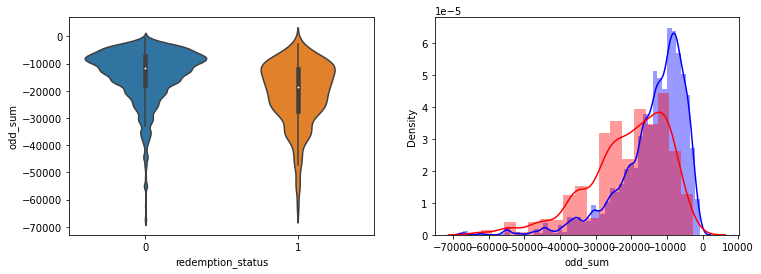

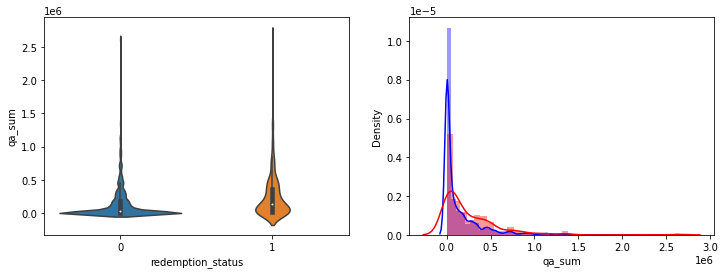

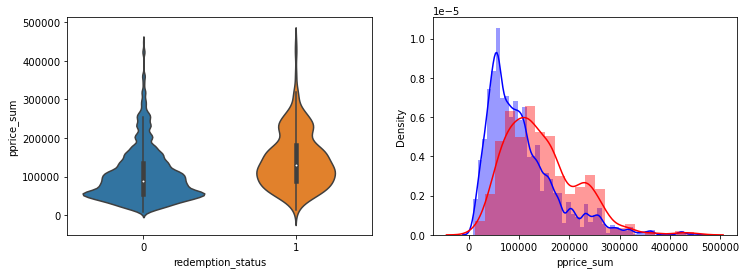

In [ ]:
show_hist_by_target(train, train_columns)

In [ ]:
heat_columns = ['category','no_of_customers','other_discount_x','selling_price_x','campaign_type','campaign_duration','age_range','income_bracket','day','other_discount_y','selling_price_y','odd_sum','price_sum']

hc = train[heat_columns].corr()

In [ ]:
train[heat_columns].head()

,category,no_of_customers,other_discount_x,selling_price_x,campaign_type,campaign_duration,age_range,income_bracket,day,other_discount_y,selling_price_y,odd_sum,price_sum
0,6,19.224000,-44.367382,117.276864,0,47,3.0,5.0,11,-25.583099,163.966826,-7930.760842,436274.446738
1,6,20.333333,-10.207037,70.885046,0,47,2.0,3.0,4,-20.013685,188.638474,-7705.268702,5323.510000
2,11,1.761194,-76.767366,342.826195,1,32,3.0,7.0,27,-12.873370,112.067666,-12487.169143,48980.998333
3,6,3.500000,-4.451964,88.694903,0,47,3.0,5.0,9,-12.880868,100.896997,-3052.765833,3697.783333
4,6,27.312500,-30.665116,200.991719,0,48,3.0,3.0,2,-12.264174,85.016352,-6892.466021,289181.848333


<AxesSubplot:>

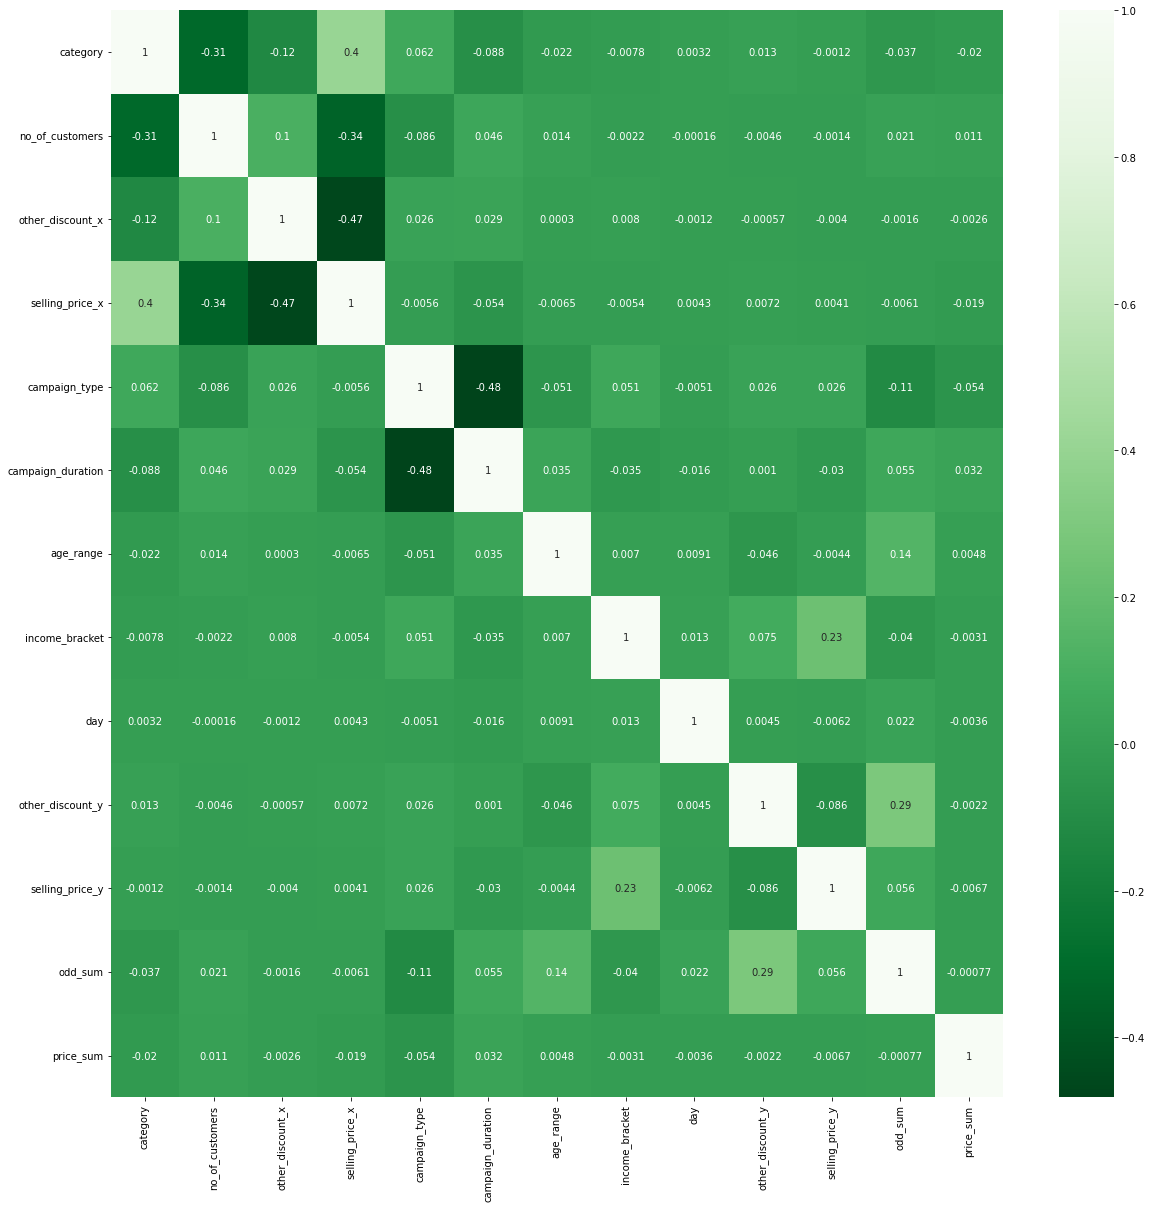

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(hc, cmap= 'Greens_r', annot=True)

In [ ]:
train.drop(['redemption_status'], axis=1, inplace=True)

## Model Building - To be Covered Are:
1. Logistic Regression
2. kNN
3. Naive Bayes
4. Decision Tree
5. Random Forest
6. Logistic Regression -- Bagged
7. kNN -- Bagged
8. Naive Bayes - Bagged
9. Decision Tree -- Bagged
10. Logistic Regression -- Boosted
11. Naive Bayes -- Boosted
12. Decision Tree -- Boosted
13. Random Forest --Boosted
14. Gradient Boosting Classifier
15. Light GBM (LGBM)

In [ ]:
x = pd.DataFrame(train)
y = target
col_names = ['cd_sum','coupon_discount_x', 'coupon_used_x', 'item_counts', 'no_of_customers',
       'od_sum', 'other_discount_x', 'price_sum', 'qu_sum', 'quantity_x',
       'selling_price_x', 't_counts', 'total_discount_mean',
       'total_discount_sum', 'campaign_type', 'campaign_duration',
       'family_size', 'no_of_children',
       'income_bracket', 'coupon_discount_y', 'coupon_used_y',
       'no_of_items', 'other_discount_y', 'quantity_y',
       'selling_price_y', 'cdd_sum', 'customer_id_count', 'odd_sum', 'qa_sum',
       'pprice_sum']
# col_names = ['cd_sum','coupon_discount_x', 'coupon_used_x', 'item_counts', 'no_of_customers',
#        'od_sum', 'other_discount_x', 'price_sum', 'qu_sum', 'quantity_x',
#        'selling_price_x', 't_counts', 'total_discount_mean',
#        'total_discount_sum', 'campaign_type', 
#        'family_size', 'no_of_children',
#        'income_bracket', 'coupon_discount_y', 'coupon_used_y',
#        'no_of_items', 'other_discount_y', 'quantity_y',
#        'selling_price_y', 'cdd_sum', 'customer_id_count', 'odd_sum', 'qa_sum',
#        'pprice_sum']
features = x[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
x[col_names] = features
x = np.array(x)

In [ ]:
x

array([[ 2.70000000e+01,  1.05300000e+03,  1.10500000e+03, ...,
         6.38586958e-01, -1.47977262e-01, -7.90890632e-01],
       [ 1.16000000e+02,  4.80000000e+01,  5.60000000e+01, ...,
         6.62184374e-01, -5.34847193e-01, -4.71808694e-01],
       [ 6.35000000e+02,  2.05000000e+02,  5.60000000e+02, ...,
         1.61765625e-01, -5.79544652e-01,  5.63785504e-02],
       ...,
       [ 7.54000000e+02,  1.00400000e+03,  8.64000000e+02, ...,
        -7.89315048e-01,  1.13435780e-01,  1.11114774e+00],
       [ 1.34000000e+02,  7.10000000e+01,  1.10000000e+01, ...,
        -2.53295326e-01, -5.10816924e-01, -3.61970883e-01],
       [ 6.81000000e+02,  6.23000000e+02,  6.86000000e+02, ...,
         4.89657361e-01,  8.86918856e-01, -4.29600563e-01]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2439)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((54858, 41), (54858,), (23511, 41), (23511,))

# hyper parameter tuning


## Bayesian Optimization 

In [ ]:
# bayesian optimization 패키지 설치
# !pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

### 함수의 입력값 search 범위(하이퍼 파라미터 별 입력 범위) 를 설정

In [ ]:
bayesian_params = {
    'max_depth': (6, 16), 
    'num_leaves': (24, 64), 
    'min_data_in_leaf': (10, 200), # min_child_samples
    'min_child_weight':(1, 50),
    'bagging_fraction':(0.5, 1.0), # subsample
    'feature_fraction': (0.5, 1.0), # colsample_bytree
    'max_bin':(10, 500),
    'lambda_l2':(0.001, 10), # reg_lambda
    'lambda_l1': (0.01, 50) # reg_alpha
}

In [ ]:
import lightgbm as lgb

def lgb_f1_score(y_hat, data):
    y_true = data.get_label().astype(int)
    y_hat = np.round(y_hat).astype(int) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat, average='weighted'), True

train_data = lgb.Dataset(data=x_train, label=y_train, free_raw_data=False)

def lgb_roc_eval_cv(max_depth, num_leaves, min_data_in_leaf, min_child_weight, bagging_fraction, 
                 feature_fraction,  max_bin, lambda_l2, lambda_l1):   
    params = {
        "num_iterations":500, "learning_rate":0.02,
        'early_stopping_rounds':100, 'metric':'auc',
        'max_depth': int(round(max_depth)), #  호출 시 실수형 값이 들어오므로 실수형 하이퍼 파라미터는 정수형으로 변경 
        'num_leaves': int(round(num_leaves)), 
        'min_data_in_leaf': int(round(min_data_in_leaf)),
        'min_child_weight': int(round(min_child_weight)),
        'bagging_fraction': max(min(bagging_fraction, 1), 0), 
        'feature_fraction': max(min(feature_fraction, 1), 0),
        'max_bin':  max(int(round(max_bin)),10),
        'lambda_l2': max(lambda_l2,0),
        'lambda_l1': max(lambda_l1, 0)
    }
    # 파이썬 lightgbm의 cv 메소드를 사용. 
    
    cv_result = lgb.cv(params, train_data, nfold=3, seed=0,  verbose_eval =100,  early_stopping_rounds=50, metrics=['auc'], feval=lgb_f1_score)
    return max(cv_result['auc-mean'])   

In [ ]:
lgbBO = BayesianOptimization(lgb_roc_eval_cv, bayesian_params, random_state=0)
lgbBO.maximize(init_points = 5, n_iter=25)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 |  max_bin  | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5809
[LightGBM] [Info] Number of data points in the train set: 36572, number of used features: 41
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5809
[LightGBM] [Info] Number of data points in the train set: 36572, number of used features: 41
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006235 seconds.
You can set `force_col_wise=true` to remo

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	cv_agg's auc: 0.911859 + 0.0102928	cv_agg's f1: 0.98575 + 0
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
| 3         | 0.8648    | 0.8891    | 0.935     | 48.93     | 7.992     | 236.1     | 13.81     | 6.795     |

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
| 7         | 0.8931    | 0.6323    | 0.9279    | 27.26     | 1.845     | 44.94     | 14.41     | 42.51     | 21.23     | 48.23     |
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9044
[LightGBM] [Info] Number of data points in the train set: 36572, number of used features: 41
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9044
[LightGBM] [Info] Number of data points in the train set: 36572, number of used features: 41
[LightGBM] [Warning] Auto-choosing col-wise multi-threadi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
| 11        | 0.8782    | 0.8032    | 0.7856    | 40.51     | 6.59      | 295.4     | 12.42     | 9.941     | 140.0     | 59.75     |
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1233
[LightGBM] [Info] Number of data points in the train set: 36572, number of used features: 41
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1233
[LightGBM] [Info] Number of data points in the train set: 36572, number of used features: 41
[LightGBM] [Warning] Auto-choosing col-wise multi-threadi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	cv_agg's auc: 0.919333 + 0.0103154	cv_agg's f1: 0.98575 + 0
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
| 19        | 0.884     | 0.9644    | 0.8266    | 23.37     | 0.6431    | 304.5     | 10.6      | 41.3      | 144.9     | 44.4      |
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008249 seconds.
You can set `force

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	cv_agg's auc: 0.914399 + 0.00895216	cv_agg's f1: 0.98575 + 0
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
| 24        | 0.8343    | 0.8324    | 0.5435    | 42.71     | 4.781     | 228.4     | 14.82     | 25.79     | 157.1     | 61.25     |
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7723
[LightGBM] [Info] Number of data points in the train set: 36572, number of used features: 41
[LightGBM] [Warning] Auto-choosing col-wise multi-threadi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 |  max_bin  | max_depth | min_ch... | min_da... | num_le... |  

데이터그대로, 베이지안튜닝  
| 30        | 0.9307    | 1.0       | 0.5       | 0.01      | 0.001     | 42.11     | 11.22     | 31.87     | 200.0     | 64.0      |  
데이터그대로, 베이지안튜닝+f1-score  
| 30        | 0.8869    | 0.7962    | 0.8055    | 5.456     | 9.706     | 358.3     | 10.07     | 6.75      | 32.92     | 36.68     |


In [ ]:
params = lgbBO.max['params']

In [ ]:
# dictionary에 있는 target값을 모두 추출
target_list = []
for result in lgbBO.res:
    target = result['target']
    target_list.append(target)
print(target_list)
# 가장 큰 target 값을 가지는 순번(index)를 추출
print('maximum target index:', np.argmax(np.array(target_list)))

[0.8864008578381598, 0.8879042217517567, 0.8647927053294614, 0.8799407877590945, 0.8636342578489907, 0.8631289938805627, 0.893064112360045, 0.8861739279984566, 0.8747843346804219, 0.8881088340914937, 0.8781835755046505, 0.8880744587953373, 0.8923705246537509, 0.8700784624067529, 0.8380731049375193, 0.8759697006620364, 0.8855782834436727, 0.8647989986529114, 0.8840128324567104, 0.9324320765301978, 0.8785446218844347, 0.8339259634390697, 0.8341285132610373, 0.8342656971352369, 0.8700970250666775, 0.8525469027117772, 0.8876151519536167, 0.8751706601241489, 0.8787539938805627, 0.8869696896619418]
maximum target index: 19


In [ ]:
max_dict = lgbBO.res[np.argmax(np.array(target_list))]
print(max_dict)

{'target': 0.9324320765301978, 'params': {'bagging_fraction': 0.6988204802600908, 'feature_fraction': 0.9660757567475873, 'lambda_l1': 1.1283877191876799, 'lambda_l2': 6.911608197236618, 'max_bin': 68.10699765361503, 'max_depth': 11.576110031361186, 'min_child_weight': 34.718608412164315, 'min_data_in_leaf': 13.97742609628643, 'num_leaves': 54.444802638132984}}


In [ ]:
params={'bagging_fraction': 0.6988204802600908,
        'feature_fraction': 0.9660757567475873,
        'lambda_l1': 1.1283877191876799,
        'lambda_l2': 6.911608197236618,
        'max_bin': 68,
        'max_depth': 11,
        'min_child_weight': 34.718608412164315,
        'min_data_in_leaf': 14,
        'num_leaves': 54}

In [ ]:
# 'params': {'bagging_fraction': 0.6988204802600908, 
#             'feature_fraction': 0.9660757567475873, 
#             'lambda_l1': 1.1283877191876799, 
#             'lambda_l2': 6.911608197236618, 
#             'max_bin': 68.10699765361503, 
#             'max_depth': 11.576110031361186, 
#             'min_child_weight': 34.718608412164315, 
#             'min_data_in_leaf': 13.97742609628643, 
#             'num_leaves': 54.444802638132984}

#         "num_iterations":500, "learning_rate":0.02,
#         'early_stopping_rounds':100, 'metric':'auc',
#         'max_depth': int(round(max_depth)), #  호출 시 실수형 값이 들어오므로 실수형 하이퍼 파라미터는 정수형으로 변경 
#         'num_leaves': int(round(num_leaves)), 
#         'min_data_in_leaf': int(round(min_data_in_leaf)),
#         'min_child_weight': int(round(min_child_weight)),
#         'bagging_fraction': max(min(bagging_fraction, 1), 0), 
#         'feature_fraction': max(min(feature_fraction, 1), 0),
#         'max_bin':  max(int(round(max_bin)),10),
#         'lambda_l2': max(lambda_l2,0),
#         'lambda_l1': max(lambda_l1, 0)

In [ ]:
def train_apps_all(x,y, params):

    train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=2439)
    
    clf = LGBMClassifier(
        **params
#                 nthread=4,
#                 n_estimators=1000,
#                 learning_rate=0.02,
#                 max_depth = 11,
#                 max_bin=68,
#                 silent=-1,
#                 verbose=-1,
#                 bagging_fraction= 0.6988204802600908,
#                 feature_fraction= 0.9660757567475873,
#                 lambda_l1= 1.1283877191876799,
#                 lambda_l2= 6.911608197236618,
#                 max_bin= 68.10699765361503,
#                 max_depth= 11.576110031361186,
#                 min_child_weight= 34.718608412164315,
#                 min_data_in_leaf= 13.97742609628643,
#                 num_leaves= 54.444802638132984
                )

    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (test_x, test_y)], 
            eval_metric= 'auc', verbose=100, early_stopping_rounds= 100)
    
    return clf

In [ ]:
clf = train_apps_all(x,y, params)

[LightGBM] [Warning] feature_fraction is set=0.9660757567475873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9660757567475873
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] lambda_l1 is set=1.1283877191876799, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1283877191876799
[LightGBM] [Warning] bagging_fraction is set=0.6988204802600908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6988204802600908
[LightGBM] [Warning] lambda_l2 is set=6.911608197236618, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.911608197236618
[100]	training's auc: 0.96582	training's binary_logloss: 0.0298945	valid_1's auc: 0.957964	valid_1's binary_logloss: 0.031398


In [ ]:
cols = train.columns.to_list()
cols

['coupon_id',
 'customer_id',
 'brand',
 'brand_type',
 'category',
 'cd_sum',
 'coupon_discount_x',
 'coupon_used_x',
 'item_counts',
 'no_of_customers',
 'od_sum',
 'other_discount_x',
 'price_sum',
 'qu_sum',
 'quantity_x',
 'selling_price_x',
 't_counts',
 'total_discount_mean',
 'total_discount_sum',
 'campaign_type',
 'campaign_duration',
 'age_range',
 'marital_status',
 'rented',
 'family_size',
 'no_of_children',
 'income_bracket',
 'coupon_discount_y',
 'coupon_used_y',
 'day',
 'dow',
 'no_of_items',
 'month',
 'other_discount_y',
 'quantity_y',
 'selling_price_y',
 'cdd_sum',
 'customer_id_count',
 'odd_sum',
 'qa_sum',
 'pprice_sum']

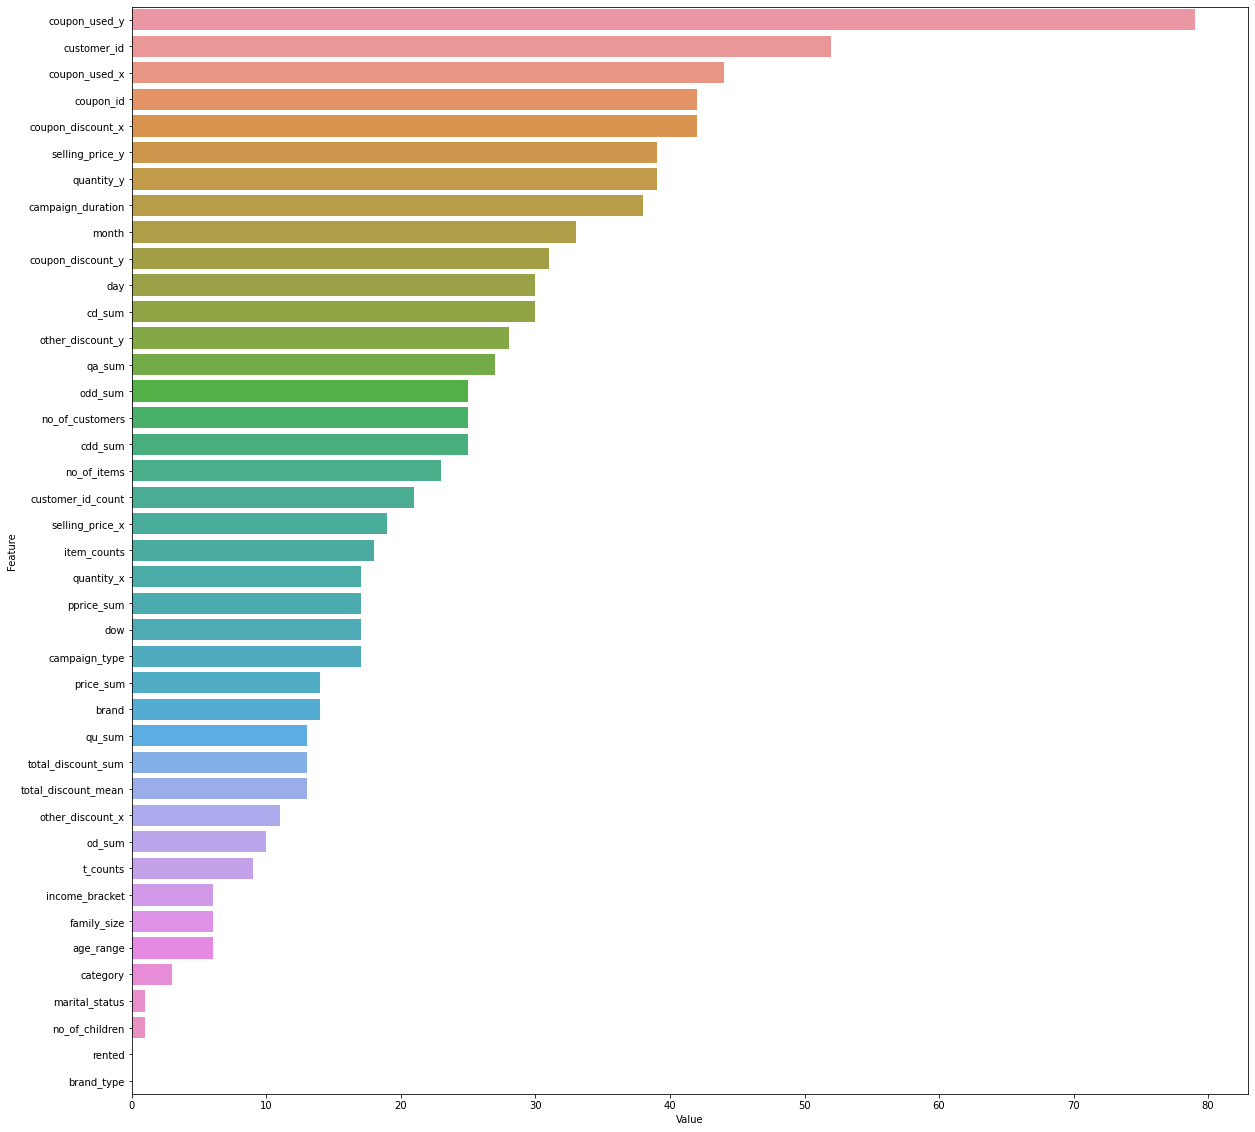

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, cols)), columns = ['Value', 'Feature'])

plt.figure(figsize=(20,20))
sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by='Value', ascending=False))
plt.show()

In [ ]:
preds = clf.predict_proba(test)[:, 1 ]
test['redemption_status'] = preds
# test[['id', 'redemption_status']].to_csv('prev_baseline_tuning_02.csv', index=False)

In [ ]:
test_id

0             3
1             4
2             5
3             8
4            10
          ...  
50221    128584
50222    128588
50223    128591
50224    128593
50225    128594
Name: id, Length: 50226, dtype: int64

In [ ]:
preds

array([0.51162078, 0.18116814, 0.54650441, ..., 0.19568204, 0.39816439,
       0.38715148])

(array([5517., 8765., 9881., 9228., 2893., 2825., 3938., 3520., 3006.,
         653.]),
 array([0.00566178, 0.06873656, 0.13181134, 0.19488611, 0.25796089,
        0.32103567, 0.38411045, 0.44718523, 0.51026   , 0.57333478,
        0.63640956]),
 <BarContainer object of 10 artists>)

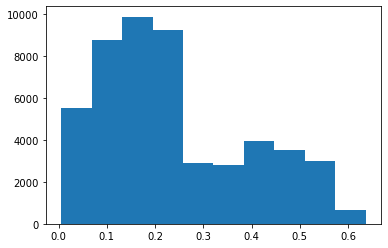

In [ ]:
plt.hist(preds)